# 🌎 기후 변화 분석 실습

이 노트북은 기온(Temperature), 이산화탄소(CO₂) 농도, 강수량(Precipitation) 데이터를 기반으로 한 기후 변화 시계열 분석을 다룹니다.

- **분석 데이터**는 실제가 아닌 `모의 데이터`로 구성되어 있으며,
- 1980년부터 2024년까지의 연도별 기후 변수를 시각화하고,
- CO₂와 기온 사이의 **상관관계**와 **회귀분석**도 수행합니다.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 연도: 1980~2024
years = np.arange(1980, 2025)

# 모의 기온 (약간의 상승 추세 + 노이즈)
temperature = 14.0 + 0.02 * (years - 1980) + np.random.normal(0, 0.1, len(years))

# 모의 CO₂ 농도 (상승 추세 + 노이즈)
co2 = 338 + 2.1 * (years - 1980) + np.random.normal(0, 1.5, len(years))

# 모의 강수량 (큰 추세 없이 약간의 주기적 패턴)
precipitation = 1000 + 10 * np.sin((years - 1980) * 0.5) + np.random.normal(0, 20, len(years))

# DataFrame 구성
df = pd.DataFrame({
    'Year': years,
    'Temperature': temperature,
    'CO2': co2,
    'Precipitation': precipitation
})

df.head()


,Year,Temperature,CO2,Precipitation
0,1980,13.947628,341.493231,1028.333411
1,1981,14.154047,340.302471,1012.670364
2,1982,14.158693,340.605319,1008.130502
3,1983,13.973630,343.864594,1042.445004
4,1984,14.069647,347.716859,1011.508647


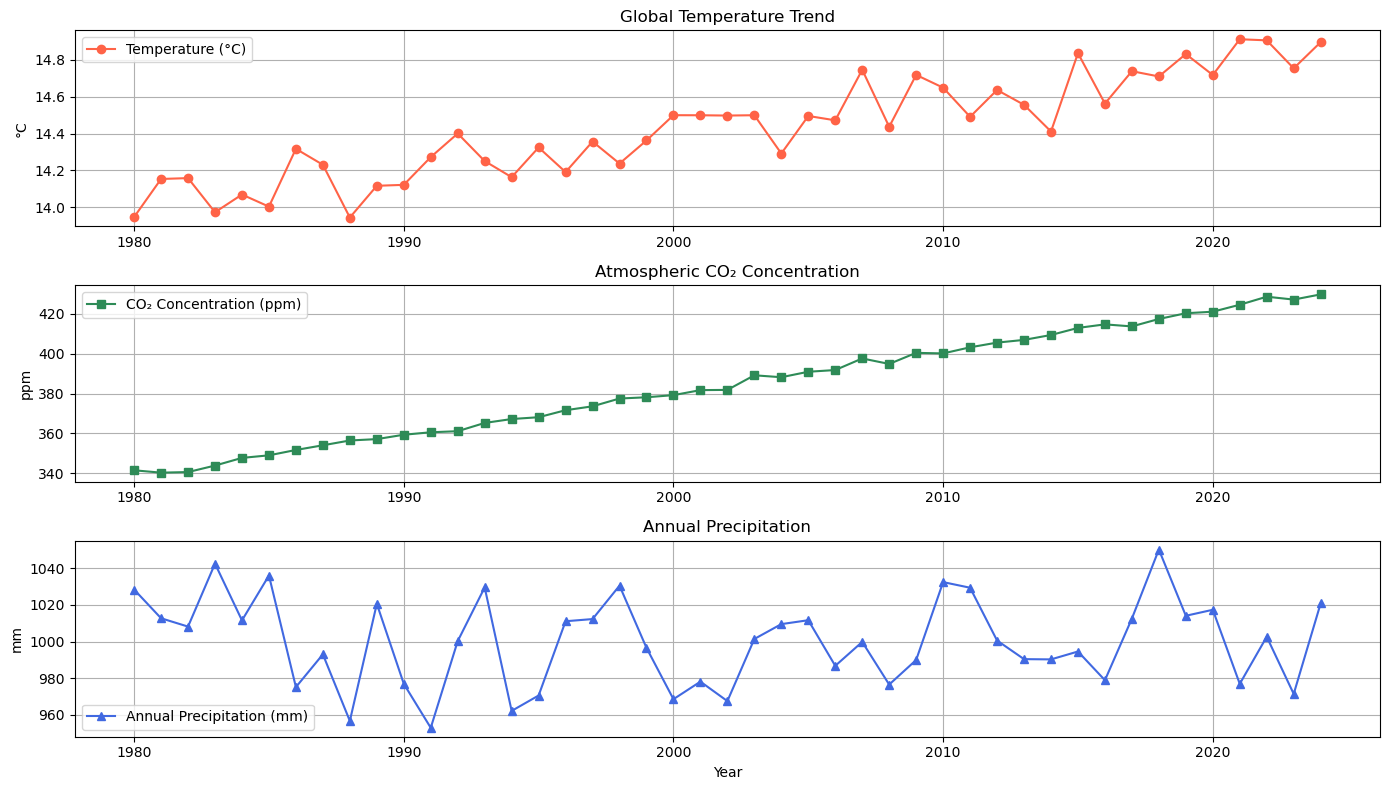

In [2]:
plt.figure(figsize=(14, 8))

# 기온
plt.subplot(3, 1, 1)
plt.plot(df['Year'], df['Temperature'], marker='o', color='tomato', label='Temperature (°C)')
plt.title('Global Temperature Trend')
plt.ylabel('°C')
plt.grid(True)
plt.legend()

# CO2
plt.subplot(3, 1, 2)
plt.plot(df['Year'], df['CO2'], marker='s', color='seagreen', label='CO₂ Concentration (ppm)')
plt.title('Atmospheric CO₂ Concentration')
plt.ylabel('ppm')
plt.grid(True)
plt.legend()

# 강수량
plt.subplot(3, 1, 3)
plt.plot(df['Year'], df['Precipitation'], marker='^', color='royalblue', label='Annual Precipitation (mm)')
plt.title('Annual Precipitation')
plt.xlabel('Year')
plt.ylabel('mm')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


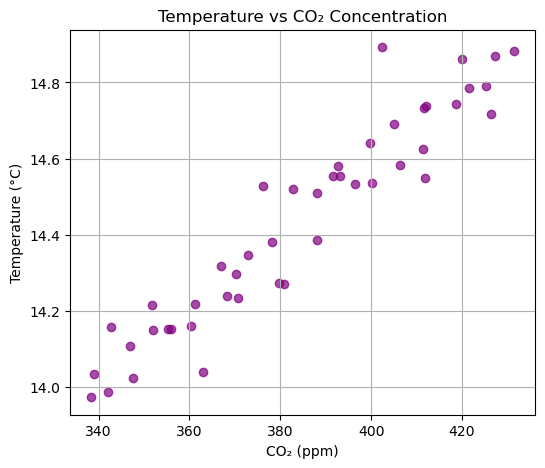

In [3]:
plt.figure(figsize=(6, 5))
plt.scatter(df['CO2'], df['Temperature'], c='purple', alpha=0.7)
plt.title('Temperature vs CO₂ Concentration')
plt.xlabel('CO₂ (ppm)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


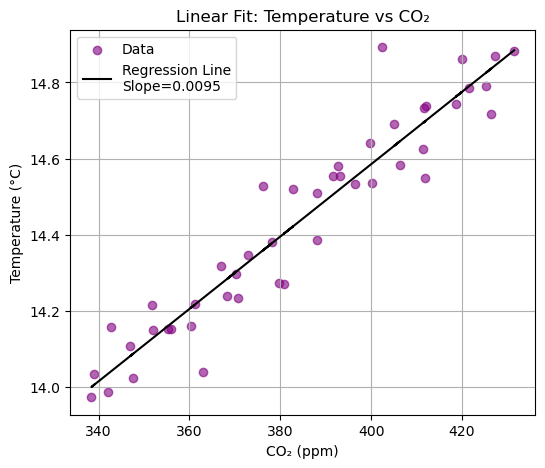

In [5]:
# 회귀선 계산
slope, intercept = np.polyfit(df['CO2'], df['Temperature'], 1)

# 시각화
plt.figure(figsize=(6, 5))
plt.scatter(df['CO2'], df['Temperature'], c='purple', alpha=0.6, label='Data')
plt.plot(df['CO2'], slope * df['CO2'] + intercept, color='black', label=f'Regression Line\nSlope={slope:.4f}')
plt.title('Linear Fit: Temperature vs CO₂')
plt.xlabel('CO₂ (ppm)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()


## 📈 결과 해석

- 연도별 **기온은 꾸준히 상승**하고 있으며,
- 이와 함께 **CO₂ 농도도 꾸준히 증가**하고 있습니다.
- 기온과 CO₂ 간에는 **선형적 양의 상관관계**가 보입니다.
- 이는 **지구 온난화의 원인으로 CO₂ 증가가 중요한 역할**을 함을 보여주는 시뮬레이션 예입니다.


# 🥕 경남 시군단위 작물 추천 시뮬레이션

이 노트북은 경상남도 내 5개 시군에 대해 기온, 강수량 등의 기후 데이터를 기반으로  
작물(밭작물, 과수류)에 적합한 지역을 선형회귀 모델로 예측합니다.

- 기후 조건은 가상 데이터이며,
- 작물별로 '선호 조건'을 정의하여 선호 점수를 계산합니다.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 시군 이름
cities = ['Changwon', 'Jinju', 'Miryang', 'Hamyang', 'Geoje']

# 연도
years = np.arange(2010, 2025)

# 지역별 기온 및 강수량 생성 (도시별 편차 존재)
np.random.seed(42)
data = []
for city in cities:
    temp_base = 13.5 + np.random.rand() * 1.5  # 도시마다 온도 베이스 다름
    rain_base = 1000 + np.random.rand() * 200
    
    for year in years:
        temperature = temp_base + 0.03 * (year - 2010) + np.random.normal(0, 0.1)
        rainfall = rain_base + 5 * np.sin((year - 2010) * 0.4) + np.random.normal(0, 20)
        data.append([city, year, round(temperature, 2), round(rainfall, 2)])

df = pd.DataFrame(data, columns=["City", "Year", "Temperature", "Rainfall"])
df.head()


,City,Year,Temperature,Rainfall
0,Changwon,2010,14.13,1220.60
1,Changwon,2011,14.07,1187.41
2,Changwon,2012,14.28,1209.08
3,Changwon,2013,14.10,1205.65
4,Changwon,2014,14.14,1185.83


In [3]:
# 작물 종류와 선호 조건 (기온, 강수량 범위)
crops = {
    'SweetPotato':  {'T_opt': 16,  'R_opt': 1000},
    'Apple':        {'T_opt': 14,  'R_opt': 900},
    'Blueberry':    {'T_opt': 13.5,'R_opt': 1100},
    'Peach':        {'T_opt': 15.5,'R_opt': 950},
    'Garlic':       {'T_opt': 13,  'R_opt': 850}
}


In [4]:
# 작물 선호 점수 계산 함수 (온도와 강수량에서의 거리 기반)
def crop_score(temp, rain, T_opt, R_opt):
    t_score = np.exp(-((temp - T_opt)**2) / 2)
    r_score = np.exp(-((rain - R_opt)**2) / 5000)
    return t_score * r_score

# 작물별 점수 계산
for crop, params in crops.items():
    df[crop] = df.apply(lambda row: crop_score(row['Temperature'], row['Rainfall'], params['T_opt'], params['R_opt']), axis=1)

df.head()


,City,Year,Temperature,Rainfall,SweetPotato,Apple,Blueberry,Peach,Garlic
0,Changwon,2010,14.13,1220.60,0.000010,1.171100e-09,0.044721,1.707062e-07,6.210766e-13
1,Changwon,2011,14.07,1187.41,0.000138,6.668061e-08,0.184418,4.573867e-06,7.292777e-11
2,Changwon,2012,14.28,1209.08,0.000036,4.845142e-09,0.068297,7.024516e-07,2.784677e-12
3,Changwon,2013,14.10,1205.65,0.000035,7.643697e-09,0.089601,7.898802e-07,5.632969e-12
4,Changwon,2014,14.14,1185.83,0.000178,7.933727e-08,0.186718,5.856504e-06,8.350139e-11


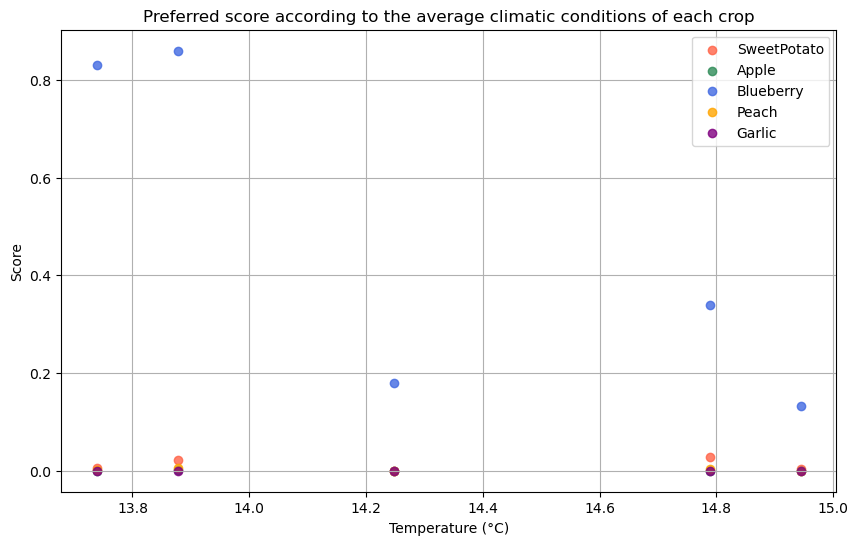

In [5]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 도시별 평균값 및 작물별 예측
grouped = df.groupby('City').mean(numeric_only=True).reset_index()

plt.figure(figsize=(10, 6))

colors = ['tomato', 'seagreen', 'royalblue', 'orange', 'purple']
for i, crop in enumerate(crops.keys()):
    plt.scatter(grouped['Temperature'], grouped[crop], label=crop, alpha=0.8, color=colors[i])

plt.title("Preferred score according to the average climatic conditions of each crop")
plt.xlabel("Temperature (°C)")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# 최신년도 데이터에서 작물 선호도가 가장 높은 작물 추천
latest_year = df['Year'].max()

recommend = df[df['Year'] == latest_year].copy()
recommend['BestCrop'] = recommend[crops.keys()].idxmax(axis=1)
recommend[['City', 'Year', 'Temperature', 'Rainfall', 'BestCrop']]


,City,Year,Temperature,Rainfall,BestCrop
14,Changwon,2024,14.42,1224.03,Blueberry
29,Jinju,2024,13.99,1071.95,Blueberry
44,Miryang,2024,14.98,1095.08,Blueberry
59,Hamyang,2024,15.05,1157.66,Blueberry
74,Geoje,2024,13.86,1128.15,Blueberry
